# DATA 240-21, Fall 2024
# Assignment #3 (Release on Nov 2nd, 2024, Due 11:59pm on Nov 19th, 2024)

### Notes
- This assignment should be submitted in Canvas as a format of ipython notebook (assignment3.ipynb).
- No late assignments will be accepted. Do not accept any other format. Minimum penalty is 2pts with acceptable excuse.
- You may collaborate on homework but must independently write code/solutions. Copying and other forms of cheating will not be tolerated and will result in a zero score for the homework (minimal penalty) or a failing grade for the course.
- Your work will be graded in terms of correctness, completeness, and clarity, not just the answer. Thus, correct answers with no or poorly written supporting steps may receive very little credit.

### NOTE: Please do not use any open-source algorithm for gradient decent method. Instead, you need to write gradient descent method from scratch.

In [1]:
import pandas as pd
import seaborn as sns

# Ensure up to 200 rows are shown
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

# 1. (5 pts) Linear regression with gradient decent

Please download housing.csv. This is a real-life dataset consisting of housing sales prices in the city of Windsor, Ontario, Canada. You can find a description of the variables in housing.txt. Our target variable is ‘price’.

- Linear regression using gradient descent method from scratch 
- This is the task of Linear regression with multi variables.

- You need to find the optimum Weights using gradient decent method from scratch.
- Before applying gradient descent method, you might need to normalize variables, which is called feature scaling or normalization.
- In gradient descent algorithm, weight needs to be updated every iteration.



In [2]:
df = pd.read_csv("data/housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Converting the column from object to int = {column =}")
        df[column] = df[column].replace({'yes': 1, 'no': 0})

df.describe()

Converting the column from object to int = column ='driveway'
Converting the column from object to int = column ='recroom'
Converting the column from object to int = column ='fullbase'
Converting the column from object to int = column ='gashw'
Converting the column from object to int = column ='airco'
Converting the column from object to int = column ='prefarea'


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_45782/2898197046.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'yes': 1, 'no': 0})


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [4]:
import numpy as np
X_home, y_home = df[df.columns[1:]], df[df.columns[0]]
print(f"{X_home.shape = }, {y_home.shape = }")

X_home_mean = X_home.mean()
X_home_std = X_home.std()

X_home = (X_home - np.mean(X_home, axis=0)) / np.std(X_home, axis=0)

print(f"Training set size: {X_home.shape}")


X_home.shape = (546, 11), y_home.shape = (546,)
Training set size: (546, 11)


## 1-1. (3pts) Please build a gradient descent algorithm based on the following formulas.

- Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
- Please fit the data using the Linear regression model with the optimum Weight.
- To simply the problem, please plot ‘price’ vs ‘lotsize’ as the below. The ‘price’ and ‘lotsize’ should be original scale instead of normalized scale.
- Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2. The y and 𝑦̂  should be original scale instead of normalized scale.

Linear Regression Model Initialized with alpha=0.01, epochs=500
Linear Regression Model with Point-wise error Initialized with alpha=0.01, epochs=500
Start time for the gradient descent: 2024-11-19 02:42:28.987089
	 Epoch    1 /  500, Cost: 2676139350.6538
	 Epoch    2 /  500, Cost: 2619251307.6028
	 Epoch    3 /  500, Cost: 2563773523.9796
	 Epoch    4 /  500, Cost: 2509665010.1930
	 Epoch    5 /  500, Cost: 2456886191.9665
	 Epoch    6 /  500, Cost: 2405398854.3668
	 Epoch    7 /  500, Cost: 2355166088.2356
	 Epoch    8 /  500, Cost: 2306152238.9160
	 Epoch    9 /  500, Cost: 2258322857.1730
	 Epoch   10 /  500, Cost: 2211644652.2084
	 Epoch   11 /  500, Cost: 2166085446.6771
	 Epoch  101 /  500, Cost:  432311423.3977
	 Epoch  201 /  500, Cost:  158915970.5399
	 Epoch  301 /  500, Cost:  122202461.6145
	 Epoch  401 /  500, Cost:  117174774.6451
	 Epoch  500 /  500, Cost:  116464244.7557
End time for the gradient descent: 2024-11-19 02:42:31.207238, total time: 0:00:02.220149


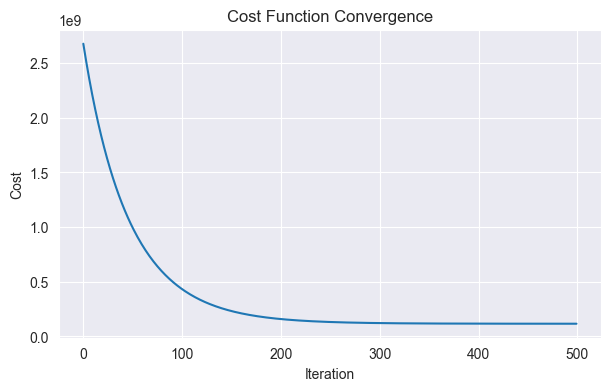

In [5]:
from abc import ABC, abstractmethod
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression(ABC):
    def __init__(self, alpha=0.01, epochs=1000):
        """
        Abstract Base Class for Linear Regression models.
        """
        self.alpha = alpha
        self.epochs = epochs
        self.weights = None
        self.cost_history = []
        print(f"Linear Regression Model Initialized with alpha={alpha}, epochs={epochs}")

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    @abstractmethod
    def compute_cost(self, y_actual, y_predictions):
        pass

    @abstractmethod
    def update_weights(self, X, y_actual, y_prediction):
        pass

    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.weights)

    def fit(self, X, y):
        X = self.add_intercept(X)
        start = datetime.now()
        print(f"Start time for the gradient descent: {start}")
        m, n = X.shape
        self.weights = np.zeros(n)
        for epoch in range(self.epochs):
            predictions = np.dot(X, self.weights)
            self.update_weights(X, y, predictions)
            cost = self.compute_cost(y, predictions)
            self.cost_history.append(cost)
            if epoch <= 10 or epoch % 100 == 0 or epoch == self.epochs - 1:
                print(f'\t Epoch {epoch + 1:4} / {self.epochs:4}, Cost: {cost:>15.4f}')

        end = datetime.now()
        print(f"End time for the gradient descent: {end}, total time: {end - start}")

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence')
        plt.grid(True)
        plt.show()


class LinearRegressionUsingPointWiseError(LinearRegression):
    def __init__(self, alpha=0.01, epochs=1000):
        """
        Linear Regression Model with Gradient Descent.
        """
        super().__init__(alpha, epochs)
        print(f"Linear Regression Model with Point-wise error Initialized with alpha={alpha}, epochs={epochs}")

    def compute_cost(self, y_actual, y_predictions):
        """
        Compute cost using Mean Squared Error (MSE).
        Cost Function:
            The cost is calculated using the Mean Squared Error (MSE):
                J(w) = (1 / (2 * m)) * Σ (y_predicted[i] - y_actual[i])^2
            Where:
                - m: Number of samples
                - y_predicted[i]: Prediction for the i-th sample
                - y_actual[i]: Actual value for the i-th sample
        """
        m = len(y_actual)
        cost = 0.0
        for i in range(m):
            cost += (y_predictions[i] - y_actual[i])**2
        cost = cost / (2*m)
        return cost

    def update_weights(self, X, y_actual, y_predictions):
        """
        Gradient Calculation:
        The gradient of the cost with respect to the weights is:
            ∂J/∂w[j] = (1 / m) * Σ (y_predicted[i] - y_actual[i]) * X[i, j]
        Where:
            - w[j]: Weight for the j-th feature
            - X[i, j]: Value of the j-th feature for the i-th sample

        Weight Update Rule:
        Weights are updated using the gradient descent algorithm:
            w[j] = w[j] - α * ∂J/∂w[j]
        Where:
            - α: Learning rate
        """
        m, n = X.shape
        for i in range(m):
            error = y_predictions[i] - y_actual[i]
            for j in range(n):
                dw = error * X[i, j] / m
                self.weights[j] -= self.alpha * dw



lr = LinearRegressionUsingPointWiseError(alpha=0.01, epochs=500)
lr.fit(X_home, y_home)
y_pred = lr.predict(X_home)
lr.plot_cost()


## To simply the problem, please plot ‘price’ vs ‘lotsize’ as the below. The ‘price’ and ‘lotsize’ should be original scale instead of normalized scale.

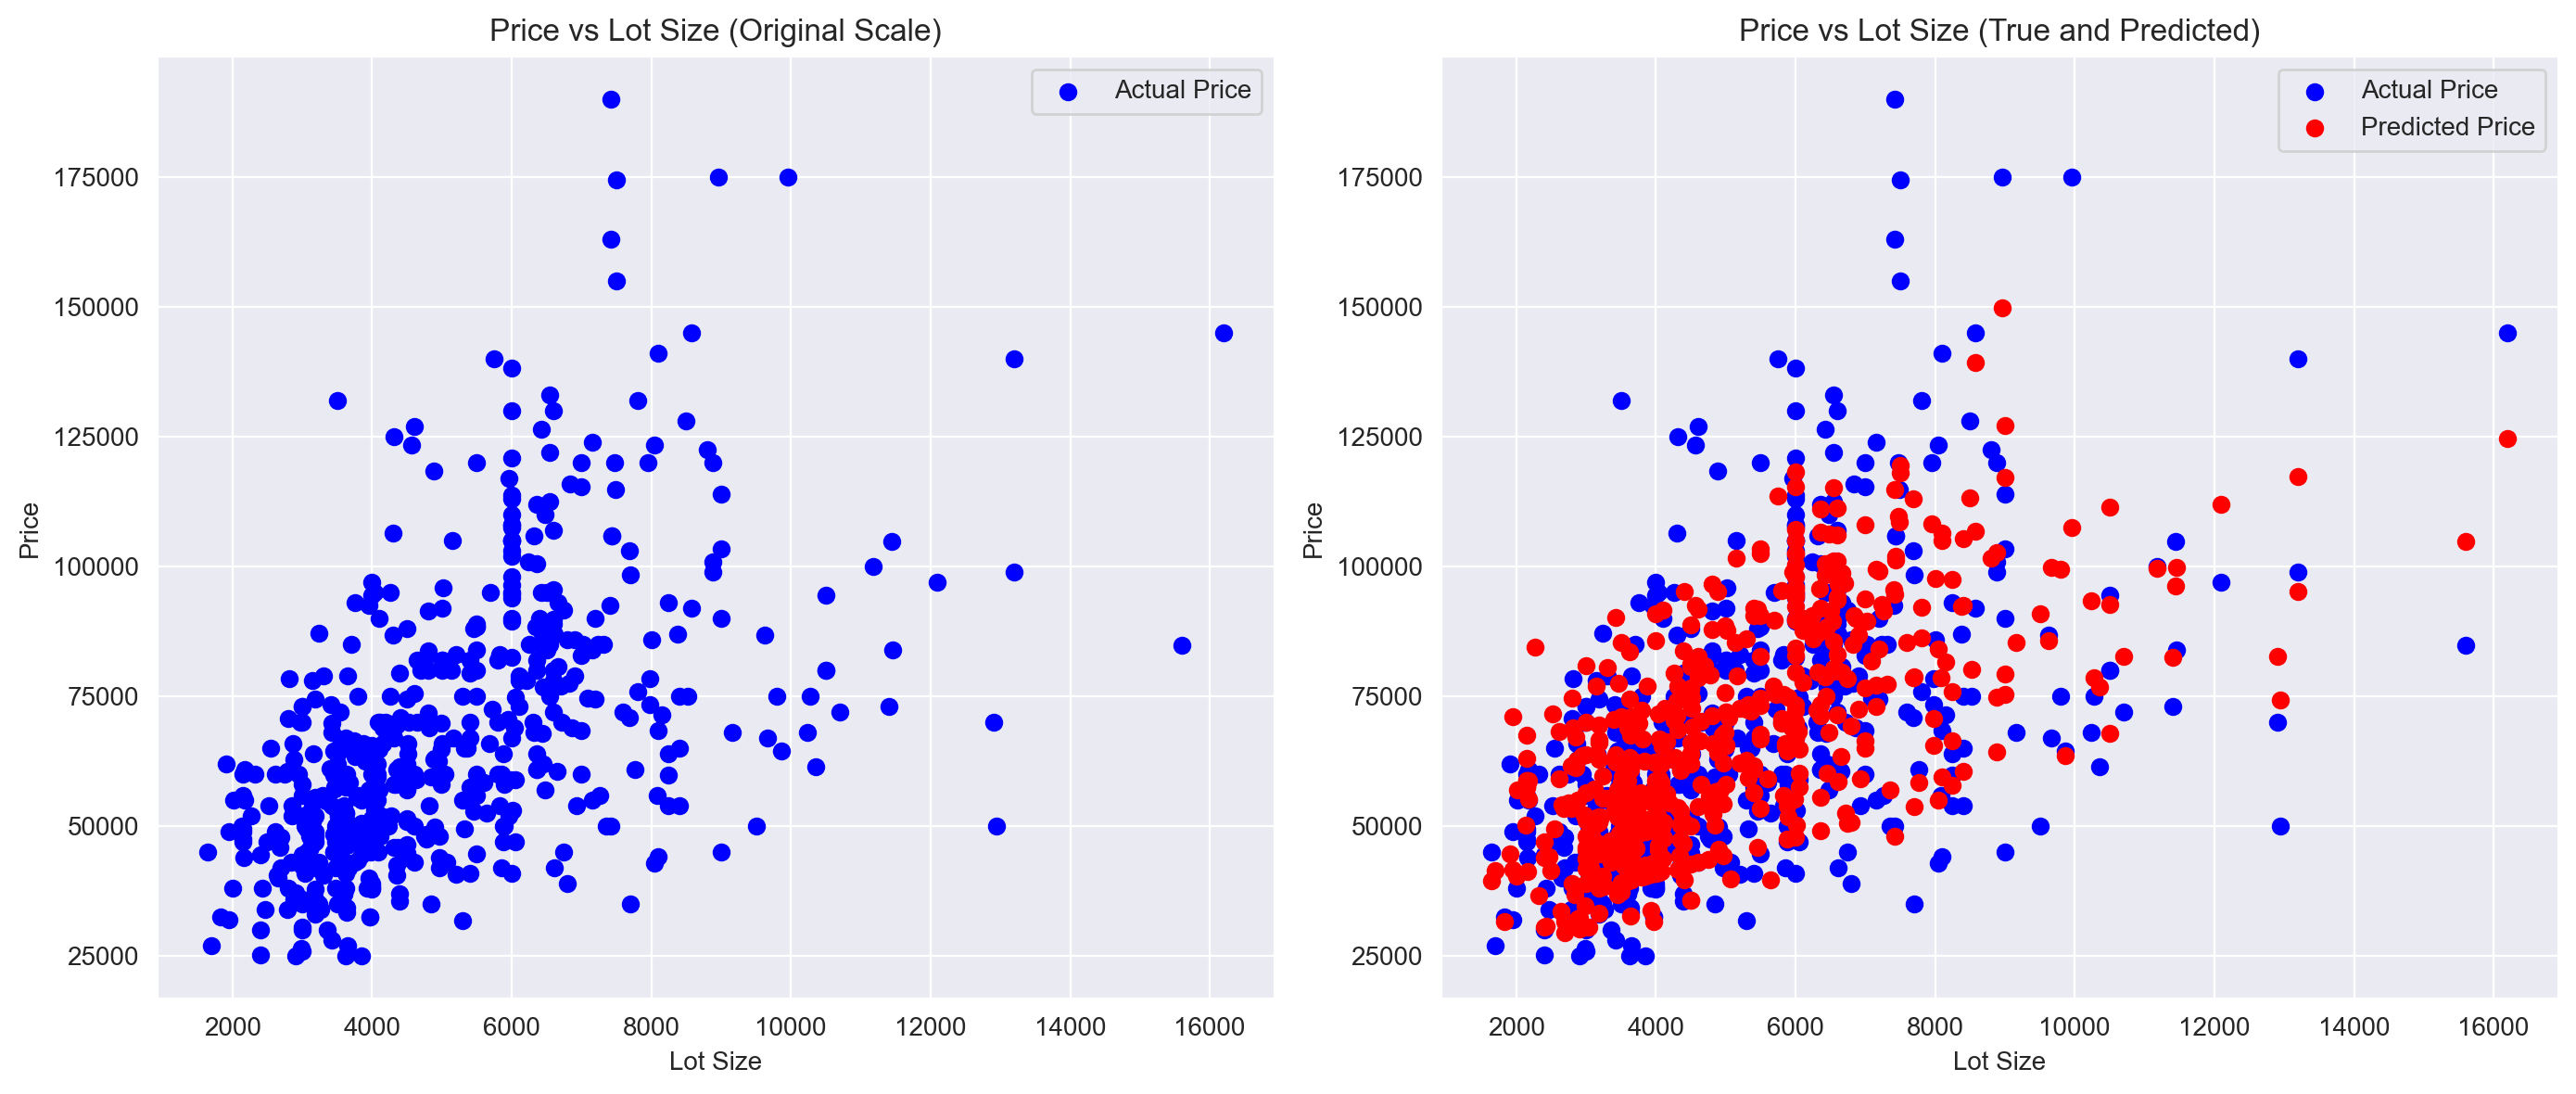

In [20]:

def scatter_plot_predictions(df, y_actual, y_prediction):
    # Extract original scale for lotsize
    lotsize = df['lotsize']

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=200)

    # Left plot: Price vs Lot size (original scale)
    # add trendline also
    axes[0].scatter(lotsize, y_actual, color='blue', label='Actual Price')
    axes[0].set_title('Price vs Lot Size (Original Scale)')
    axes[0].set_xlabel('Lot Size')
    axes[0].set_ylabel('Price')
    axes[0].grid(True)
    axes[0].legend()

    # Right plot: Price vs Lot size with Actual and Predicted Prices
    axes[1].scatter(lotsize, y_actual, color='blue', label='Actual Price')
    axes[1].scatter(lotsize, y_prediction, color='red', label='Predicted Price')
    axes[1].set_title('Price vs Lot Size (True and Predicted)')
    axes[1].set_xlabel('Lot Size')
    axes[1].set_ylabel('Price')
    axes[1].grid(True)
    axes[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

scatter_plot_predictions(df, y_home, y_pred)

## Observations for Question - 1-1-2
- The Linear Regression Model with Gradient Descent is implemented.
- The max predicted value is 150000 and the max actual value is 190000.
- The model is predicting the house prices lower than the actual prices.

## 1-1-3- Please plot ‘true-price’(y) vs ‘predicted-price’(y^̂) and display R2. Th ey and  y?̂ should be original scale instead of normalized scale.


R2 Score: 0.6727


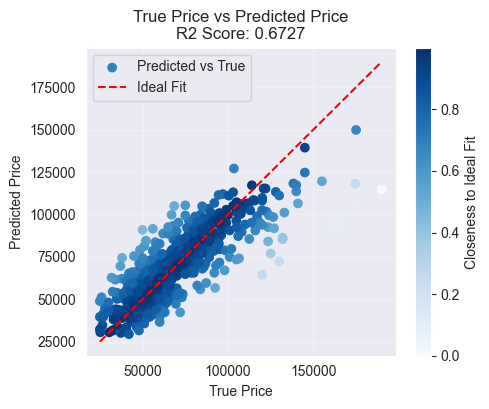

In [7]:
# Calculate R2 score

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2_score_value = 1 - (ss_residual / ss_total)
    print(f'R2 Score: {r2_score_value:.4f}')
    return r2_score_value


def r2_scatter_plot(y, y_pred, r2):
    # Calculate distance from the ideal fit line
    differences = np.abs(y - y_pred)
    normalized_diff = 1 - (differences / differences.max())  # Normalize distances to [0, 1]

    # Plot true price vs predicted price with dynamic color intensity
    plt.figure(figsize=(5, 4), dpi=100)
    scatter = plt.scatter(
        y, y_pred, c=normalized_diff, cmap='Blues', label='Predicted vs True'
    )
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
    plt.colorbar(scatter, label='Closeness to Ideal Fit')
    plt.title(f'True Price vs Predicted Price\nR2 Score: {r2:.4f}')
    plt.xlabel('True Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

r2 = r2_score(y_home, y_pred)
r2_scatter_plot(y_home, y_pred, r2)


# Observations for Question - 1-1-3

- The Linear Regression Model with Gradient Descent is implemented with two different cost functions.
- The first cost function is a simple cost function that calculates the cost by iterating over each sample.
- R2 Score is calculated for the model and it is 0.6727 which is close to 1.
- The model is predicting the house prices lower than the actual prices.

## 1-2. (2pts) Please build a gradient descent algorithm based on the following cost function.

- Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
- Please fit the data using the Linear regression model with the optimum Weight.
- Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2.


Linear Regression Model Initialized with alpha=0.01, epochs=500
Linear Regression Model with Gradient Descent with Batch Error Initialized with alpha=0.01, epochs=500
Start time for the gradient descent: 2024-11-19 02:42:32.025396
	 Epoch    1 /  500, Cost: 5352278701.3077
	 Epoch    2 /  500, Cost: 5238502615.2055
	 Epoch    3 /  500, Cost: 5127547047.9593
	 Epoch    4 /  500, Cost: 5019330020.3860
	 Epoch    5 /  500, Cost: 4913772383.9329
	 Epoch    6 /  500, Cost: 4810797708.7337
	 Epoch    7 /  500, Cost: 4710332176.4713
	 Epoch    8 /  500, Cost: 4612304477.8321
	 Epoch    9 /  500, Cost: 4516645714.3460
	 Epoch   10 /  500, Cost: 4423289304.4168
	 Epoch   11 /  500, Cost: 4332170893.3542
	 Epoch  101 /  500, Cost:  864622846.7954
	 Epoch  201 /  500, Cost:  317831941.0797
	 Epoch  301 /  500, Cost:  244404923.2291
	 Epoch  401 /  500, Cost:  234349549.2902
	 Epoch  500 /  500, Cost:  232928489.5115
End time for the gradient descent: 2024-11-19 02:42:32.089557, total time: 0:00:0

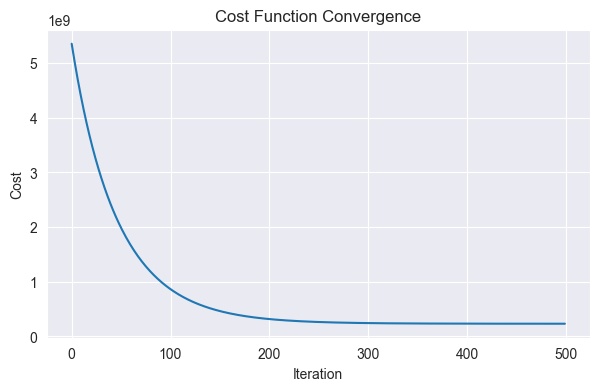

In [8]:
class LinearRegressionUsingBatchMethod(LinearRegression):

    def __init__(self, alpha=0.01, epochs=1000):
        """
        Linear Regression Model with Gradient Descent with the Matrix Based Cost function
        """
        super().__init__(alpha, epochs)
        print(f"Linear Regression Model with Gradient Descent with Batch Error Initialized with alpha={alpha}, epochs={epochs}")

    def compute_cost(self, y_actual, y_predictions):
        """
        J(w) = (1 / m) * (errors.T * errors)
        Where:
        - errors = y_predictions - y_actual (Element-wise difference between predicted and actual values)

        """
        m = len(y_actual)
        errors = y_predictions - y_actual
        cost = (1 /  m) * np.dot(errors.T, errors)
        return cost

    def update_weights(self, X, y_actual, y_predictions):
        """
        Weights are updated using the gradient descent algorithm:
            w = w - α * ∂J/∂w
        Where:
            - α: Learning rate
            - ∂J/∂w: Gradient of the cost with respect to the weights
        """
        m = len(y_actual)
        gradient = np.dot(X.T, (y_predictions - y_actual)) / m
        self.weights -= self.alpha * gradient


lr = LinearRegressionUsingBatchMethod(alpha=0.01, epochs=500)
lr.fit(X_home, y_home)
y_pred = lr.predict(X_home)
lr.plot_cost()

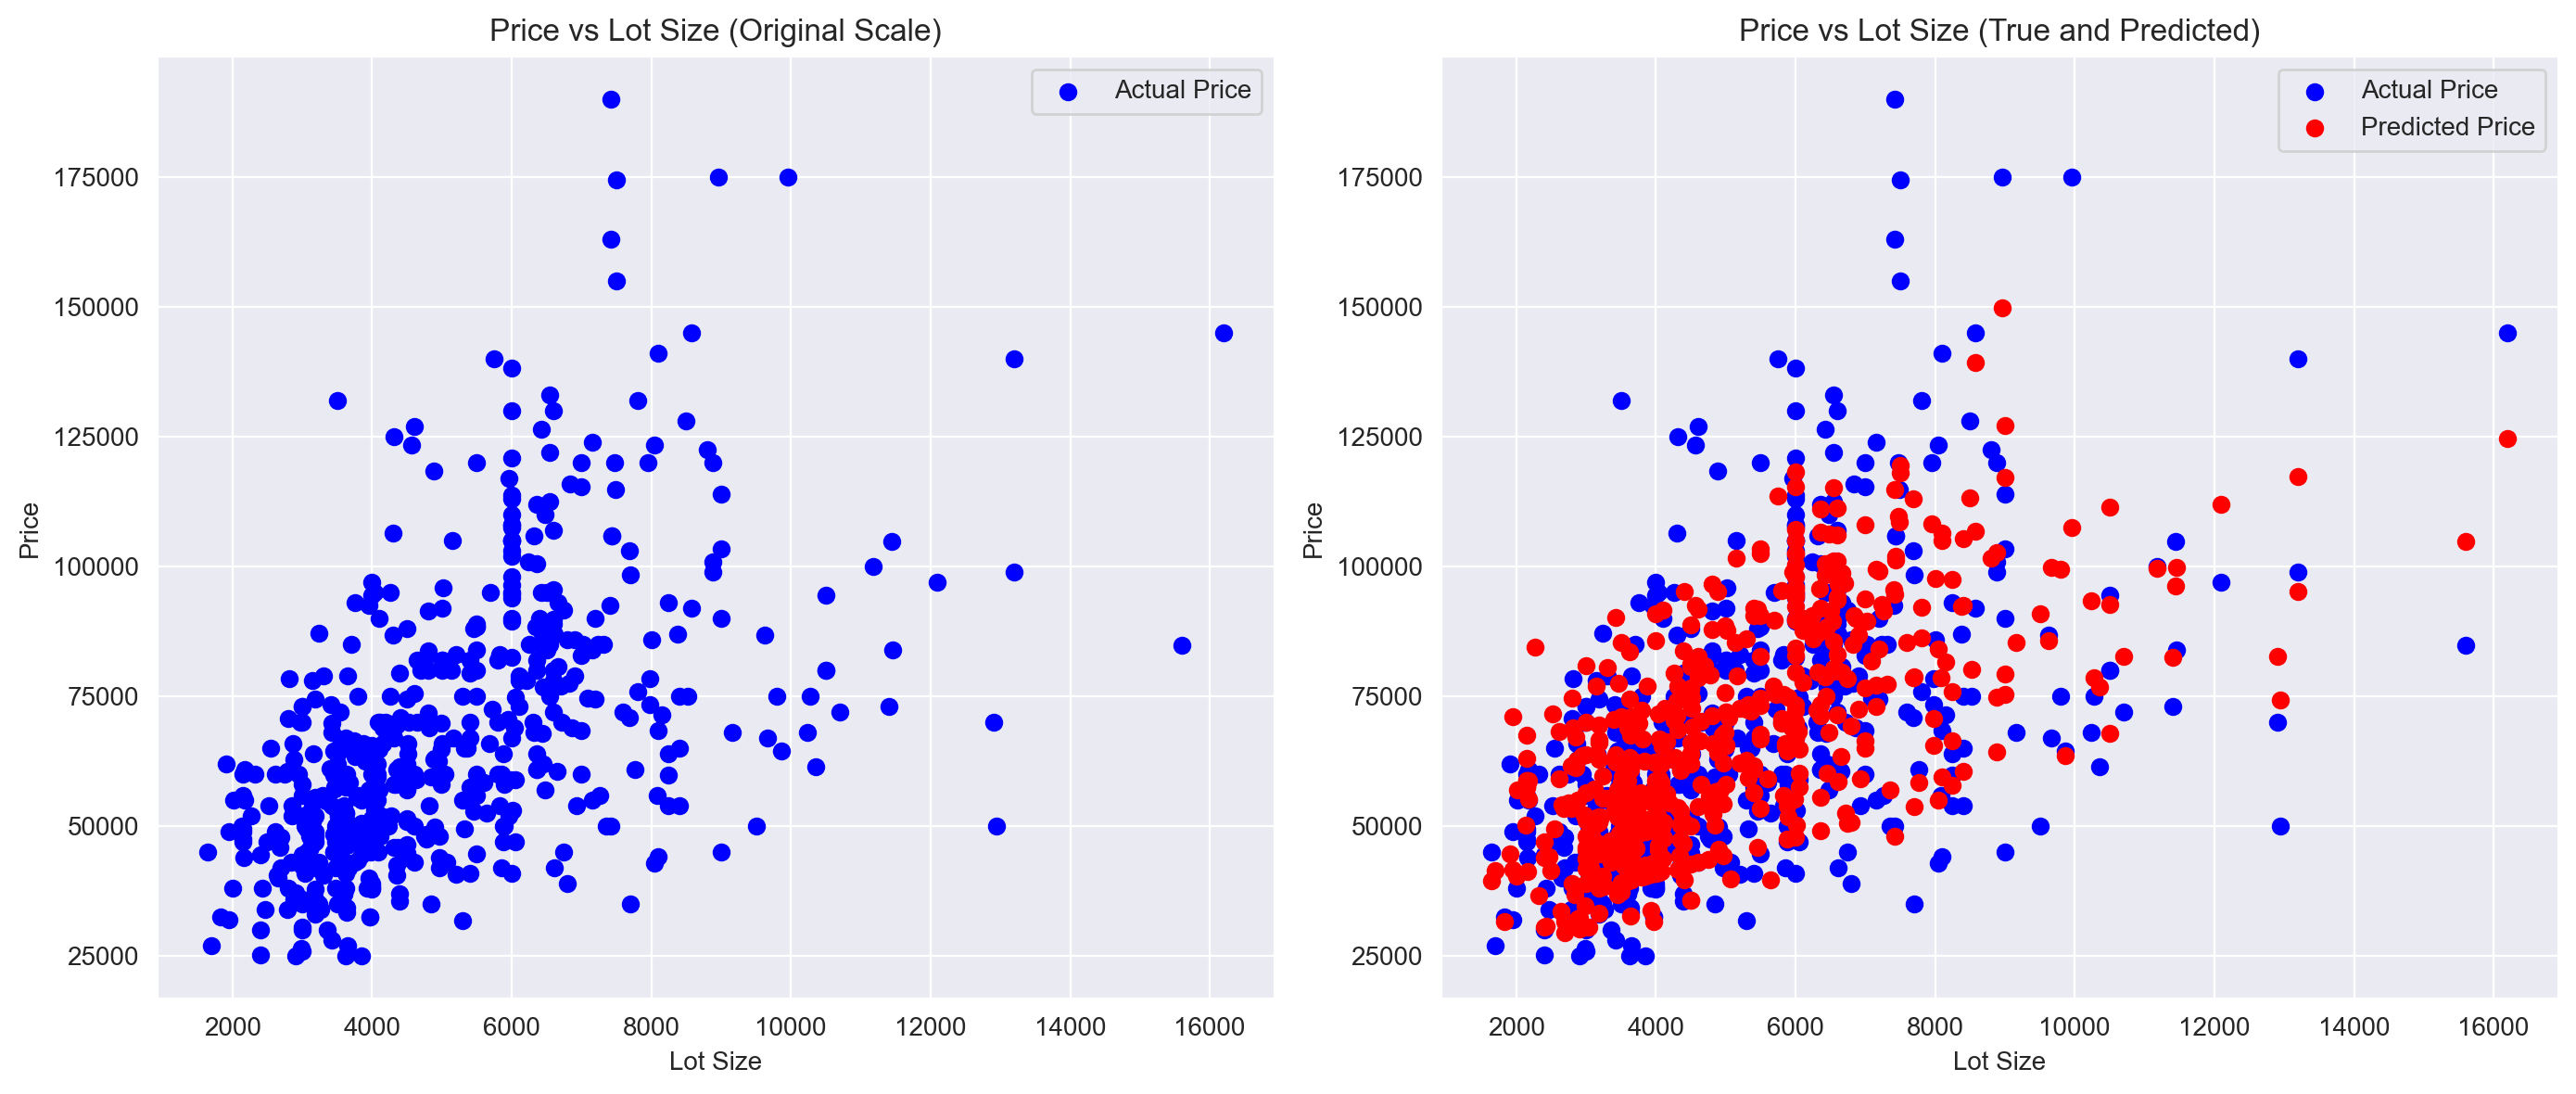

R2 Score: 0.6727


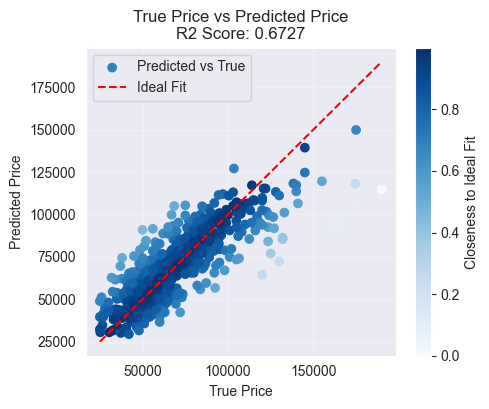

In [9]:
scatter_plot_predictions(df, y_home, y_pred)

r2 = r2_score(y_home, y_pred)
r2_scatter_plot(y_home, y_pred, r2)

# Observations for Question - 1
- The Linear Regression Model with Gradient Descent is implemented with two different cost functions.
- The first cost function is a simple cost function that calculates the cost by iterating over each sample.
- The second cost function is a batch cost function that calculates the cost using matrix operations.
- The batch cost function is more efficient and faster than the simple cost function.


# 2. (5 pts) Binary classification with logistic regression

- ### Please download heart_disease_train.csv and heart_disease_test.csv. The dataset is for cardiovascular study. The target variable is ‘TenYearCHD’, which shows whether the patient has 10-year risk of future coronary heart disease (CHD). You can find a description of the variables in cardiovascular.txt.

- ### This is the task of Binary classification with logistic regression. You need to build a logistic regression model from scratch to predict ‘TenYearCHD’.

- ### Before applying gradient descent method, you might need to fill out missing value and normalize variables.

In [10]:
heart_train_df = pd.read_csv("data/heart_disease_train.csv")
heart_test_df = pd.read_csv("data/heart_disease_test.csv")
heart_train_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [11]:
heart_train_df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Before applying gradient descent method, you might need to fill out missing value and normalize variables.

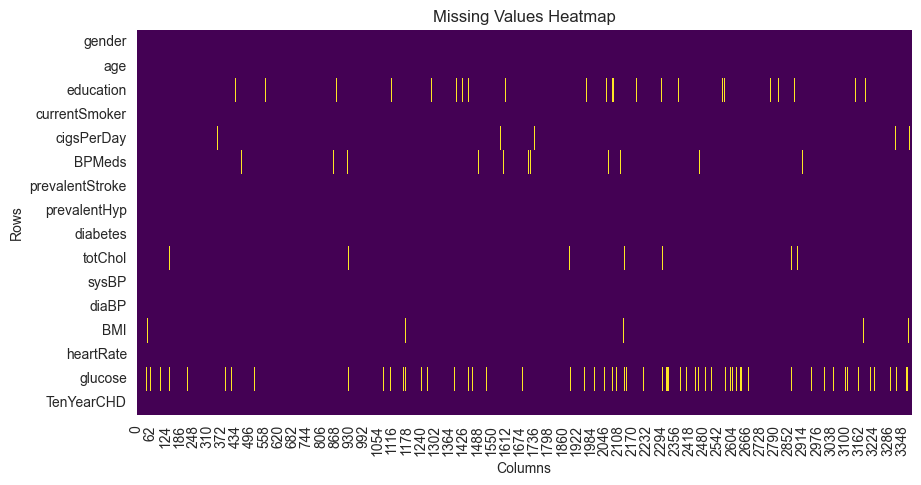

,column_name,column_dtype,distinct_values,missing_values,percent_missing,replacement_method
education,education,float64,4,84,2.477876,Mode
cigsPerDay,cigsPerDay,float64,32,25,0.737463,Mean/Median
BPMeds,BPMeds,float64,2,42,1.238938,Mode
totChol,totChol,float64,241,44,1.297935,Mean/Median
BMI,BMI,float64,1260,16,0.471976,Mean/Median
heartRate,heartRate,float64,71,1,0.029499,Mean/Median
glucose,glucose,float64,130,315,9.292035,Mean/Median


In [12]:
def find_missing_values(df):
    # Visualize missing values using a heatmap
    plt.figure(figsize=(10, 5), dpi=100)
    sns.heatmap(df.isnull().T, cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

    # Calculate missing values and distinct counts
    missing_values = df.isnull().sum()
    distinct_counts = df.nunique()

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'column_name': df.columns,
        'column_dtype': df.dtypes,
        'distinct_values': distinct_counts,
        'missing_values': missing_values,
        'percent_missing': missing_values / len(df) * 100,
        'replacement_method': [
            'Mode' if df[col].dtype == 'object' or distinct_counts[col] < 10 else 'Mean/Median'
            if missing_values[col] > 0 else None
            for col in df.columns
        ]
    })
    return results_df

missing_analysis_df = find_missing_values(heart_train_df)
missing_analysis_df[missing_analysis_df['percent_missing'] > 0.0].head(200)

## Missing Value Handling Approach

- if the distinct values are less than or equal to 10, treating that column as categorical value and then use Mode to replace the missing value
- Other wise using the Mean and Median.
    - To check if a distribution is Normal or Not I am using Kurtosis, if that is < 3 then its normal distribution so use the mean value as replacement
    - Else using the Median value to replace the value
- In each of the above techniques using a subgroup of 6 columns - "gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes", which captures very distinct subset of people either with pre-existing condition or gender or behavior.
- Within that group I am using the above mentioned techniques for the missing value handling.

In [13]:
sub_groups = ["gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]

In [14]:
from scipy.stats import kurtosis

class MissingValueImputer:

    def __init__(self, train_data, subgroup_cols=None):
        """
        Initialize the imputer with training data and optional subgroup columns.

        Parameters:
        - train_data: DataFrame to analyze for missing value replacement.
        - subgroup_cols: List of column names to use for subgroup-based replacement.
        """
        self.train_data = train_data
        self.subgroup_cols = subgroup_cols if subgroup_cols else []
        self.replacement_values = {}

    def decide_replacement_method(self, series):
        """
        Determine whether to use mean or median based on the distribution.
        If the kurtosis is high (indicating outliers), use the median; otherwise, use the mean.
        """
        if kurtosis(series.dropna()) > 3:
            return 'Median'
        return 'Mean'

    def fit(self):
        """
        Calculate replacement values for each column in the training data.
        Stores the replacement values for each subgroup (if specified) or globally otherwise.
        """
        columns_with_missing = self.train_data.isnull().sum()
        columns_with_missing = columns_with_missing[columns_with_missing > 0].index

        for col in columns_with_missing:
            if self.subgroup_cols:
                # Subgroup-based replacement using multiple subgroup columns
                replacement_method = {}
                for subgroup, group_data in self.train_data.groupby(self.subgroup_cols):
                    if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                        replacement_value = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                    else:
                        method = self.decide_replacement_method(group_data[col])
                        replacement_value = group_data[col].median() if method == 'Median' else group_data[col].mean()
                    replacement_method[subgroup] = replacement_value
                self.replacement_values[col] = replacement_method
            else:
                # Global replacement
                if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                    self.replacement_values[col] = self.train_data[col].mode().iloc[0] if not self.train_data[col].mode().empty else np.nan
                else:
                    method = self.decide_replacement_method(self.train_data[col])
                    self.replacement_values[col] = self.train_data[col].median() if method == 'Median' else self.train_data[col].mean()


    def replace(self, data):
        for col, replacement in self.replacement_values.items():
            if isinstance(replacement, dict):  # Subgroup-based replacement
                data[col] = data.groupby(self.subgroup_cols)[col].apply(
                    lambda group: group.fillna(replacement.get(tuple(group.name), np.nan))
                ).reset_index(level=self.subgroup_cols, drop=True)
            else:  # Global replacement
                data[col] = data[col].fillna(replacement)
        return data


imputer = MissingValueImputer(heart_train_df, subgroup_cols=sub_groups)
imputer.fit()

heart_train_imputed_df = imputer.replace(heart_train_df.copy())
heart_test_imputed_df = imputer.replace(heart_test_df.copy())

print(f"Train : Null values after imputations = {heart_train_imputed_df.isnull().sum().sum()}")
print(f"Test : Null values after imputations = {heart_test_imputed_df.isnull().sum().sum()}")



Train : Null values after imputations = 0
Test : Null values after imputations = 0


In [15]:
heart_train_imputed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3390.0,0.433628,0.495648,0.00,0.00,0.000,1.000,1.0
age,3390.0,49.614159,8.609617,32.00,42.00,49.000,57.000,70.0
education,3390.0,1.961652,1.019580,1.00,1.00,2.000,3.000,4.0
currentSmoker,3390.0,0.486726,0.499897,0.00,0.00,0.000,1.000,1.0
cigsPerDay,3390.0,9.032161,12.018124,0.00,0.00,0.000,20.000,70.0
BPMeds,3390.0,0.028024,0.165065,0.00,0.00,0.000,0.000,1.0
prevalentStroke,3390.0,0.004720,0.068548,0.00,0.00,0.000,0.000,1.0
prevalentHyp,3390.0,0.302065,0.459221,0.00,0.00,0.000,1.000,1.0
diabetes,3390.0,0.024779,0.155473,0.00,0.00,0.000,0.000,1.0
totChol,3390.0,236.763368,45.068948,107.00,206.00,233.500,263.000,696.0


### -  Normalize Data

In [16]:
X_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[:-1]]
y_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[-1]]
X_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[:-1]]
y_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[-1]]


X_heart_mean = X_heart_train.mean()
X_heart_std = X_heart_train.std()

X_heart_train = (X_heart_train - X_heart_mean) / X_heart_std
X_heart_test = (X_heart_test - X_heart_mean) / X_heart_std

print(f"{X_heart_train.shape = }, {y_heart_train.shape = }")
print(f"{X_heart_test.shape = }, {y_heart_test.shape = }")



X_heart_train.shape = (3390, 15), y_heart_train.shape = (3390,)
X_heart_test.shape = (848, 15), y_heart_test.shape = (848,)


## 2-3 Please build a gradient descent algorithm based on the following formulas. Instead, you may build an algorithm based on the matrix formula.

## Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset

	 Epoch    1 / 3000, Cost: 0.6931
	 Epoch    2 / 3000, Cost: 0.6902
	 Epoch    3 / 3000, Cost: 0.6873
	 Epoch    4 / 3000, Cost: 0.6845
	 Epoch    5 / 3000, Cost: 0.6817
	 Epoch    6 / 3000, Cost: 0.6789
	 Epoch    7 / 3000, Cost: 0.6762
	 Epoch    8 / 3000, Cost: 0.6735
	 Epoch    9 / 3000, Cost: 0.6708
	 Epoch   10 / 3000, Cost: 0.6682
	 Epoch  301 / 3000, Cost: 0.4221
	 Epoch  601 / 3000, Cost: 0.3925
	 Epoch  901 / 3000, Cost: 0.3857
	 Epoch 1201 / 3000, Cost: 0.3836
	 Epoch 1501 / 3000, Cost: 0.3828
	 Epoch 1801 / 3000, Cost: 0.3824
	 Epoch 2101 / 3000, Cost: 0.3823
	 Epoch 2401 / 3000, Cost: 0.3822
	 Epoch 2701 / 3000, Cost: 0.3822
	 Epoch 3000 / 3000, Cost: 0.3821


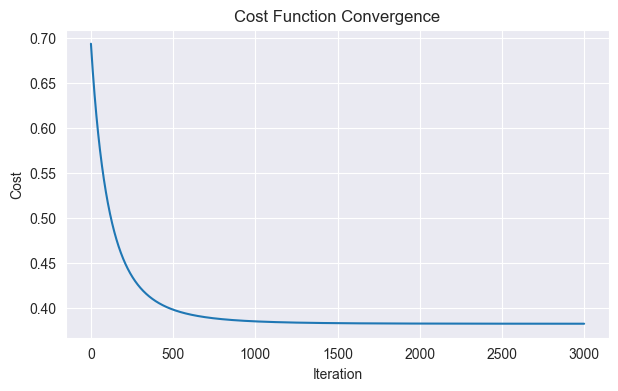

In [17]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, func='sigmoid'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.func = func
        self.weights = None
        self.costs = []

    def logistic_function(self, z):
        if self.func == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.func == 'bipolar_sigmoid':
            return (2 / (1 + np.exp(-z))) - 1
        elif self.func == 'tanh_scaled':
            return 0.5 * (np.tanh(z) + 1)
        else:
            raise ValueError(f"Unsupported logistic function: {self.func}")

    def initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_pred):
        num_samples = len(y_actual)
        cost = - (1 / num_samples) * np.sum(y_actual * np.log(y_pred) + (1 - y_actual) * np.log(1 - y_pred))
        return cost

    def update_weights(self, y_actual, y_pred, X):
        num_samples = len(y_actual)
        error = y_pred - y_actual
        dw = (1 / num_samples) * np.dot(X.T, error)
        db = (1 / num_samples) * np.sum(error)
        self.weights -= self.learning_rate * dw

    def _predict_scores(self, X):
        linear_model = np.dot(X, self.weights)
        return self.logistic_function(linear_model)

    def predict_scores(self, X):
        X = self.add_intercept(X)
        linear_model = np.dot(X, self.weights)
        return self.logistic_function(linear_model)

    def predict(self, X):
        predictions = self.predict_scores(X)
        return (predictions > 0.5).astype(int)

    def fit(self, X, y):
        X = self.add_intercept(X)
        num_samples, num_features = X.shape
        self.initialize_parameters(num_features)

        for i in range(self.num_iterations):
            predictions = self._predict_scores(X)
            self.update_weights(y, predictions, X)
            cost = self.compute_cost(y, predictions)
            self.costs.append(cost)
            if i < 10 or i % (self.num_iterations/10) == 0 or i == self.num_iterations - 1:
                print(f'\t Epoch {i + 1:4} / {self.num_iterations:4}, Cost: {cost:>2.4f}')

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.costs)), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence for Logistic Regression')
        plt.grid(True)
        plt.show()


logistic_regression = LogisticRegression(learning_rate=0.02, num_iterations=3000)
logistic_regression.fit(X_heart_train, y_heart_train)
logistic_regression.plot_cost()


## Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration.

## Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration.

Metrics on the test data.
	 True Positive (TP): 9.0000
	 True Negative (TN): 715.0000
	 False Positive (FP): 5.0000
	 False Negative (FN): 119.0000
	 Precision: 0.6429
	 Recall: 0.0703
	 F1 Score: 0.1268
	 Accuracy: 0.8538
	 ROC AUC: 0.7577


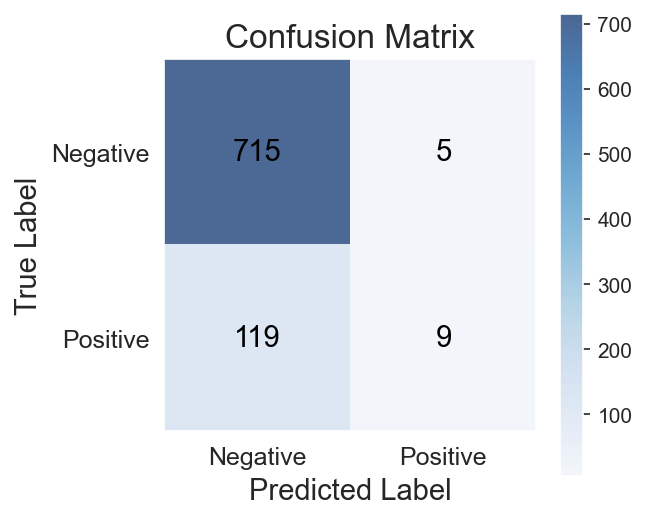

In [18]:
def compute_metrics(y_true, y_pred, y_scores=None, plot_confusion_matrix=True):
    """
    Compute evaluation metrics (TP, FP, TN, FN, Precision, Recall, F1, Accuracy, ROC AUC)
    and optionally plot the confusion matrix.
    """
    # Confusion Matrix Components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Precision, Recall, F1 Score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    roc_auc = None
    if y_scores is not None:
        from sklearn.metrics import roc_auc_score
        roc_auc = roc_auc_score(y_true, y_scores)

    metrics = {
        'True Positive (TP)': TP,
        'True Negative (TN)': TN,
        'False Positive (FP)': FP,
        'False Negative (FN)': FN,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc
    }

    print(f"Metrics on the test data.")
    for key, value in metrics.items():
        print(f"\t {key}: {value:.4f}")
    # Plot Confusion Matrix
    if plot_confusion_matrix:
        plt.figure(figsize=(4, 4), dpi=150)
        cm = np.array([[TN, FP], [FN, TP]])
        plt.imshow(cm, cmap='Blues', alpha=0.7)
        plt.title("Confusion Matrix", fontsize=16)
        plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
        plt.yticks([0, 1], ['Negative', 'Positive'], fontsize=12)
        plt.xlabel("Predicted Label", fontsize=14)
        plt.ylabel("True Label", fontsize=14)
        plt.grid(False)
        for i in range(2):
            for j in range(2):
                plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='black')

        plt.colorbar()
        plt.show()

    return metrics


y_test_pred_probabilities = logistic_regression.predict_scores(X_heart_test)
y_test_pred = logistic_regression.predict(X_heart_test)

test_metrics = compute_metrics(y_heart_test, y_test_pred, y_test_pred_probabilities)


In [19]:
# plot roc auc
